In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
READS = '../../../data/phylo_ampl_dada2/run9/dada2/output/stats.tsv'
HAPS = '../../../data/phylo_ampl_dada2/run9/dada2/output/haplotypes.tsv'

In [3]:
reads = pd.read_csv(READS, sep='\t')
reads.sample()

,s_Sample,target,input,filtered,denoisedF,denoisedR,merged,nonchim,final
21128,16_9d7,16,182,182,182,182,182,182,182


In [4]:
# remove original mosquito samples
display(reads.shape)
reads = reads[~reads.s_Sample.str.startswith('A')]
display(reads.shape)

(51392, 9)

(51200, 9)

In [5]:
# mean read counts across mosquito targets
mr = reads[~reads.target.str.startswith('P')].groupby('s_Sample').mean().reset_index()
mr['target'] = 'M'
mr.sample()

,s_Sample,input,filtered,denoisedF,denoisedR,merged,nonchim,final,target
154,13_0d5,79.983871,79.370968,79.209677,79.274194,78.354839,78.354839,78.048387,M


In [6]:
# subset to plasmodium targets only
display(reads.shape)
reads = reads[reads.target.str.startswith('P')]
display(reads.shape)

(51200, 9)

(1600, 9)

In [7]:
# add averaged mosquito targets
display(reads.shape)
reads = pd.concat([reads, mr], sort=True)
display(reads.shape)

(1600, 9)

(2400, 9)

In [8]:
# separate pool and original sample
p = reads.s_Sample.str.split('_', n=1, expand=True)
reads['pool'] = p[0]
reads['original_sample'] = p[1]
reads.sample()

,denoisedF,denoisedR,filtered,final,input,merged,nonchim,s_Sample,target,pool,original_sample
6654,41.0,41.0,41.0,41.0,41.0,41.0,41.0,12_0d4,P1,12,0d4


In [9]:
# convert pool to two-digit string
reads['pool'] = reads.pool.apply(lambda x: x.zfill(2))

In [10]:
# create pool-target combination
reads['pool_target'] = reads['pool'] + '_' + reads['target']
reads.sample()

,denoisedF,denoisedR,filtered,final,input,merged,nonchim,s_Sample,target,pool,original_sample,pool_target
487,260.177419,260.177419,260.193548,259.419355,263.903226,259.467742,259.467742,3_ps10e4,M,03,ps10e4,03_M


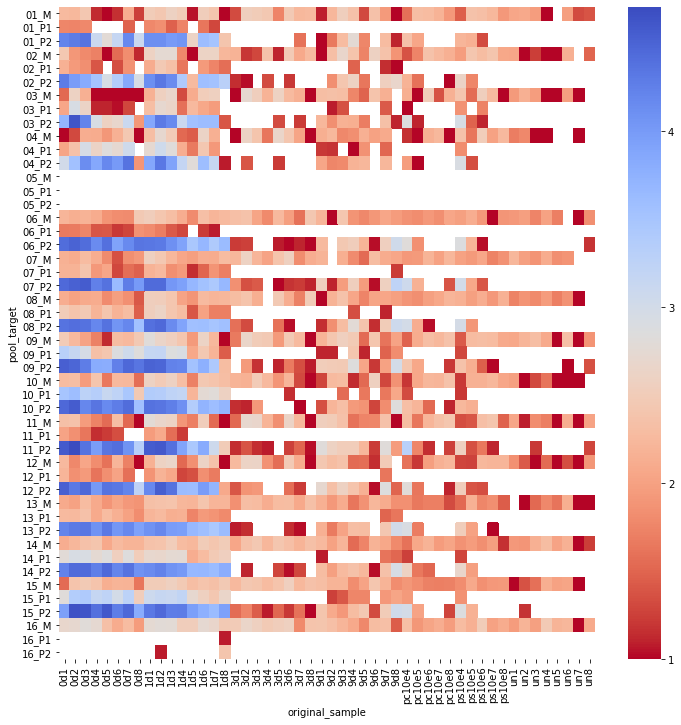

In [15]:
# heatmap of final reads
d = reads.pivot(index='pool_target', columns='original_sample', values='final').replace(0, np.nan)
d = np.log10(d)
fig, ax = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(d, ax=ax, cmap='coolwarm_r', vmin=1)
ax.collections[0].colorbar.set_ticks(range(5));